(https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Cassandra1.jpeg/800px-Cassandra1.jpeg)
## Notebook to run serial methods

With this notebook you can run live/backtest Kaissandra, plot live results and much more

In [67]:
import sys
import os

this_path = os.getcwd()
path = '\\'.join(this_path.split('\\')[:-1])+'\\'
if path not in sys.path:
    sys.path.insert(0, path)
    print(path+" added to python path")
else:
    print(path+" already in python path")
    
import pandas as pd
import datetime as dt
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mgutierrez\root\Projects\SDC\py\kaissandra\ already in python path


## Init Util Functions and Constants 

In [60]:
def get_positions_filename(asset, open_dt, close_dt):
    """  """
    
    dt_open = dt.datetime.strftime(dt.datetime.strptime(
            open_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    dt_close = dt.datetime.strftime(dt.datetime.strptime(
            close_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    filename = 'O'+dt_open+'C'+dt_close+asset
    return filename

In [125]:
live = False
start_time = '19_01_27_16_04_55'

if live:
    ext = '_LI_'
    directory = 'live'
else:
    ext = '_BT_'
    directory = 'back_test'
results_dir = '../../RNN/resultsLive/'+directory+'/trader/'
positions_dir = '../../RNN/resultsLive/back_test/positions/'+start_time+'/'
filename = results_dir+start_time+ext+"positions_soll.log"
positions = pd.read_csv(filename).sort_values(by=['Entry Time']).reset_index().drop(labels='index',axis=1)
print(positions.to_string())

     Asset           Entry Time            Exit Time  Position         Bi         Ai         Bo         Ao  ticks_d      GROI    Spread       ROI     Profit  E_spread  stoploss    stGROI     stROI
0   GBPJPY  2018.03.09 00:18:05  2018.03.09 00:26:26         1  146.67800  146.75400  146.69400  146.80100        0  0.032026  0.072911 -0.040885  -4.088475  0.051800         0  0.032026 -0.040885
1   CADJPY  2018.03.09 00:24:15  2018.03.09 00:29:15         1   82.30200   82.36800   82.32400   82.37500        0  0.008498  0.061917 -0.053419  -5.341880  0.080128         0  0.040525 -0.094304
2   EURJPY  2018.03.09 00:24:23  2018.03.09 00:48:49        -1  130.71600  130.79300  130.87000  130.90600        0 -0.117642  0.027501 -0.145142 -14.514232  0.034388         0 -0.023923 -0.235373
3   USDJPY  2018.03.09 00:25:41  2018.03.09 00:44:25         1  106.21000  106.24000  106.27400  106.29000        0  0.047063  0.015060  0.032003   3.200301  0.017882         0  0.093719 -0.090230
4   GBPJPY  201

## Build Stats File and Plot Positions

     Asset           Entry Time            Exit Time  Position         Bi         Ai         Bo         Ao  ticks_d      GROI    Spread       ROI     Profit  E_spread  stoploss    stGROI     stROI
0   GBPJPY  2018.03.09 00:18:05  2018.03.09 00:26:26         1  146.67800  146.75400  146.69400  146.80100        0  0.032026  0.072911 -0.040885  -4.088475  0.051800         0  0.032026 -0.040885
1   CADJPY  2018.03.09 00:24:15  2018.03.09 00:29:15         1   82.30200   82.36800   82.32400   82.37500        0  0.008498  0.061917 -0.053419  -5.341880  0.080128         0  0.040525 -0.094304
2   EURJPY  2018.03.09 00:24:23  2018.03.09 00:48:49        -1  130.71600  130.79300  130.87000  130.90600        0 -0.117642  0.027501 -0.145142 -14.514232  0.034388         0 -0.023923 -0.235373
3   USDJPY  2018.03.09 00:25:41  2018.03.09 00:44:25         1  106.21000  106.24000  106.27400  106.29000        0  0.047063  0.015060  0.032003   3.200301  0.017882         0  0.093719 -0.090230
4   GBPJPY  201

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


     asset          Di        Ti          Do        To  direction      groi       roi     profit  e_spread    spread       max       min  argmax  argmin  samples  extensions  stoploss                              file
0   GBPJPY  2018.03.09  00:18:05  2018.03.09  00:26:26          1  0.032026 -0.040885  -4.088475  0.051800  0.072911  0.032026 -0.038159    1695     889     1700           2         0  O180309001805C180309002626GBPJPY
1   CADJPY  2018.03.09  00:24:15  2018.03.09  00:29:15          1  0.008498 -0.053419  -5.341880  0.080128  0.061917  0.031566 -0.019425     737     715     1000           1         0  O180309002415C180309002915CADJPY
2   EURJPY  2018.03.09  00:24:23  2018.03.09  00:48:49         -1 -0.117642 -0.145142 -14.514232  0.034388  0.027501  0.000764 -0.117630    2799       1     2800           9         0  O180309002423C180309004849EURJPY
3   USDJPY  2018.03.09  00:25:41  2018.03.09  00:44:25          1  0.047063  0.032003   3.200301  0.017882  0.015060  0.051770 -

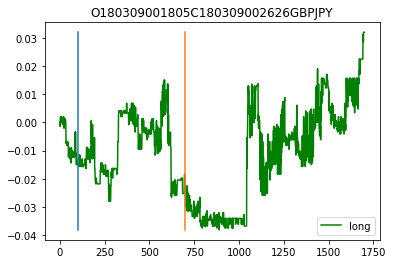

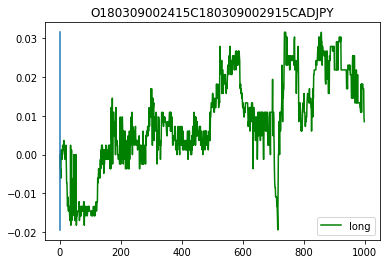

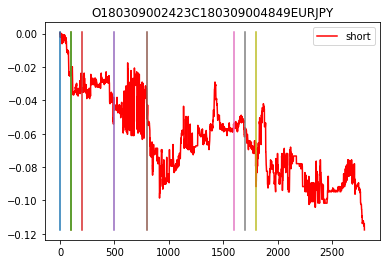

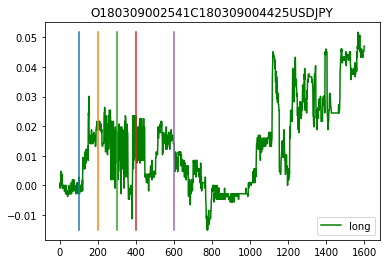

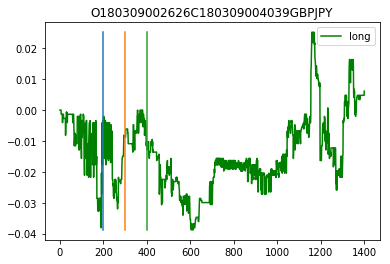

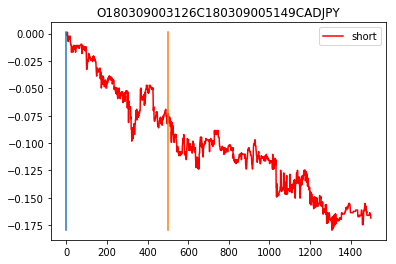

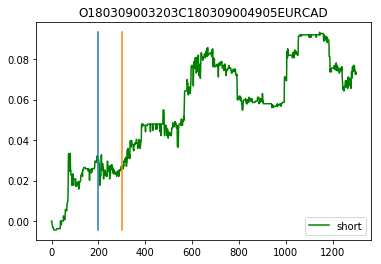

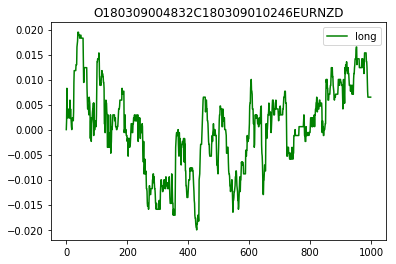

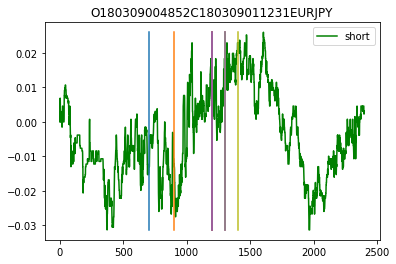

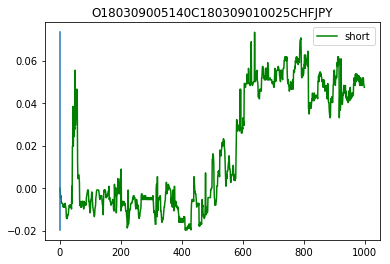

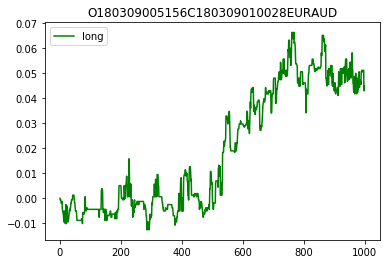

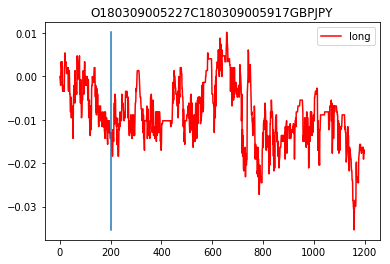

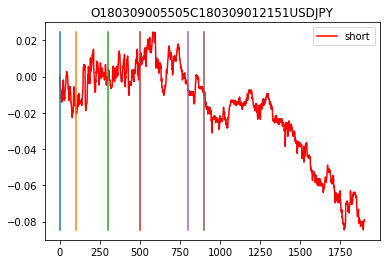

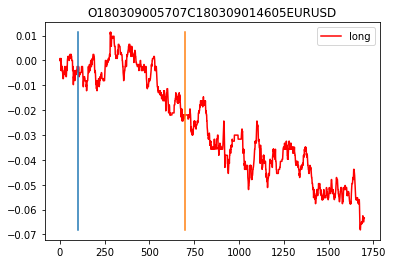

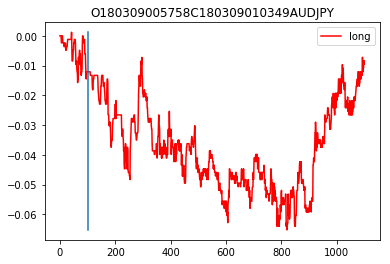

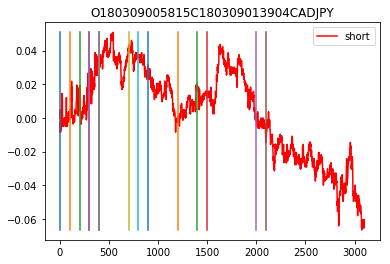

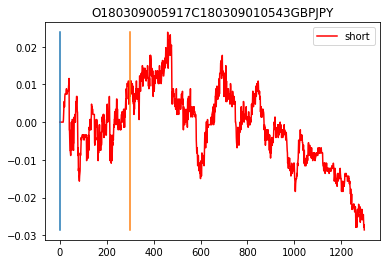

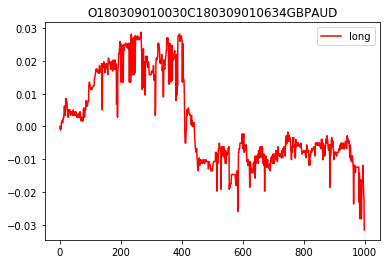

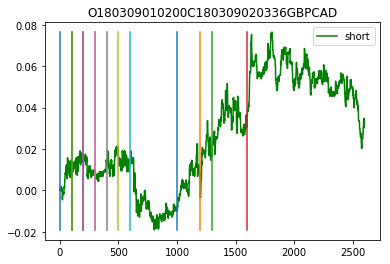

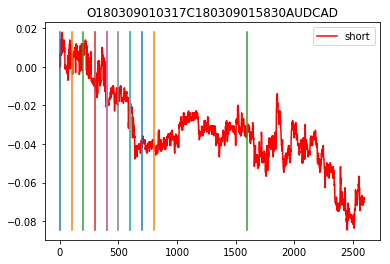

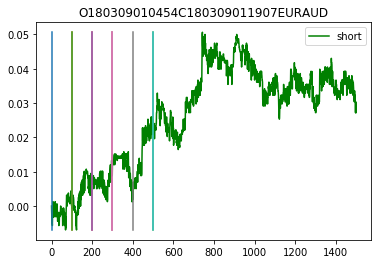

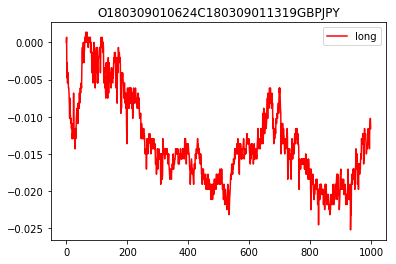

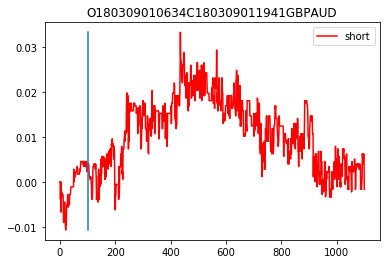

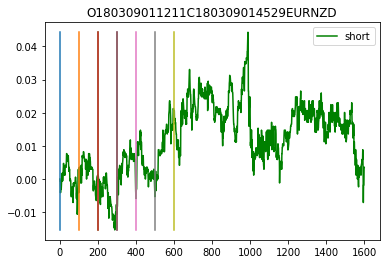

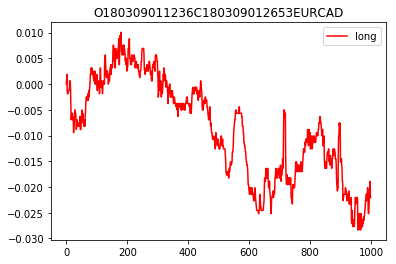

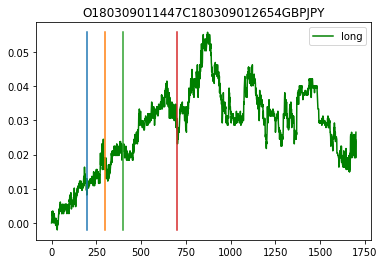

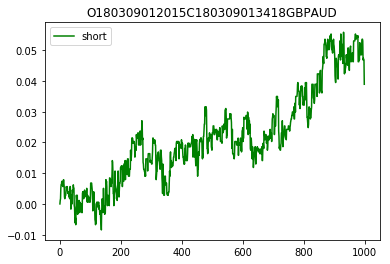

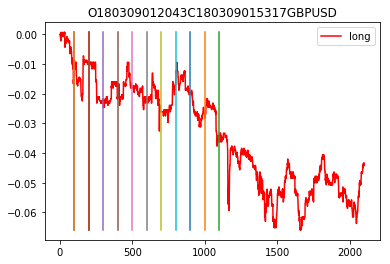

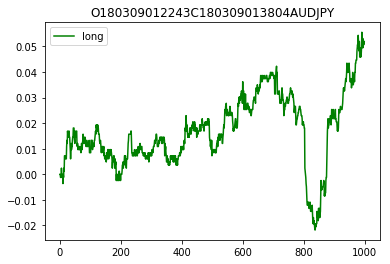

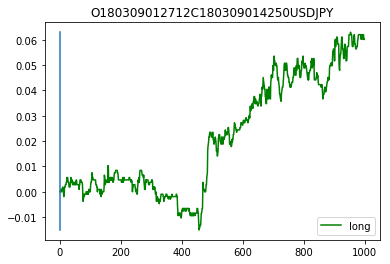

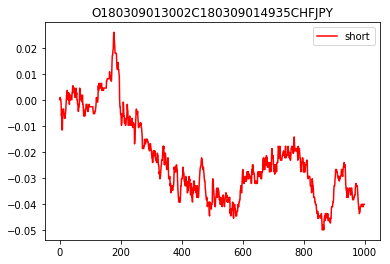

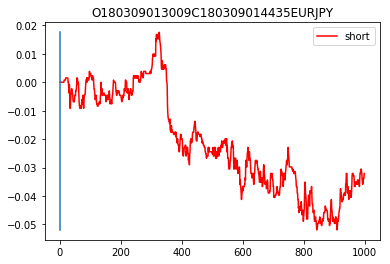

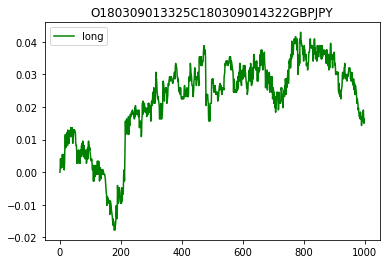

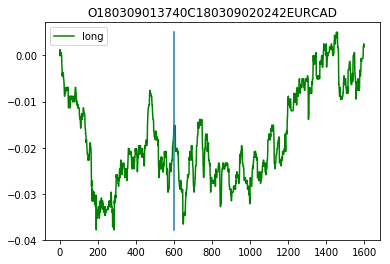

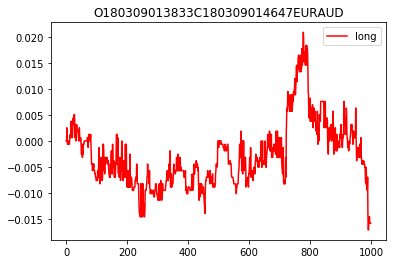

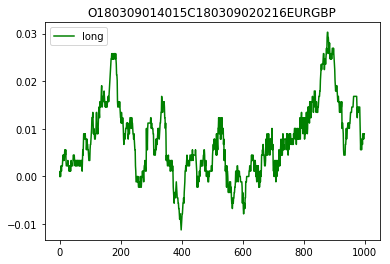

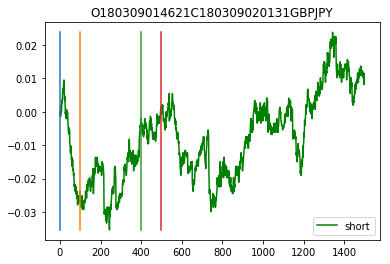

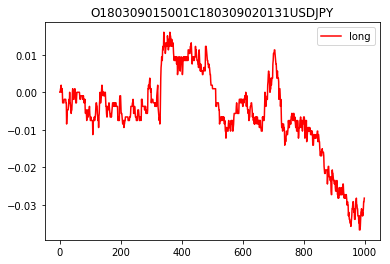

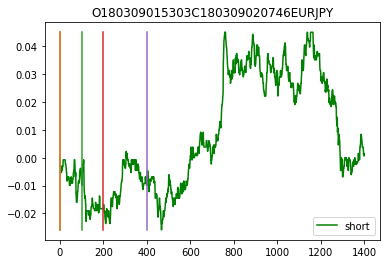

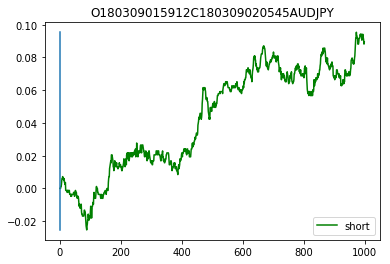

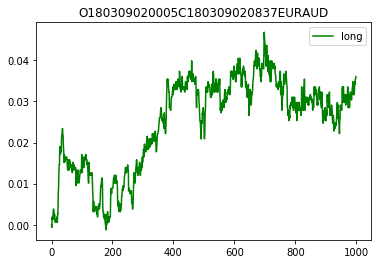

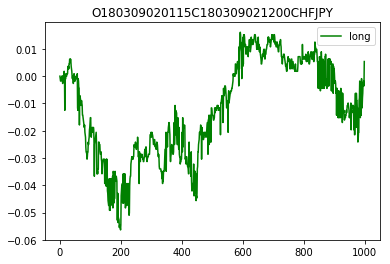

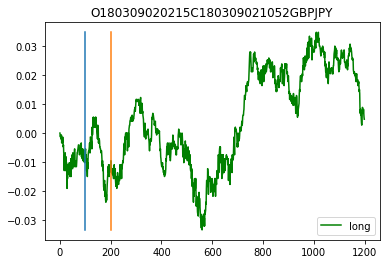

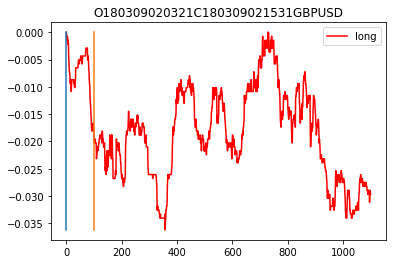

In [123]:
columns = ['asset','Di','Ti','Do','To','direction','groi','roi','profit','e_spread','spread','max','min','argmax','argmin','samples','extensions','stoploss','file']
pos_format = pd.DataFrame(data=0,columns=columns,index=range(positions.shape[0]))
plt_index = 0
for p in range(positions.shape[0]):
    #print(positions.iloc[p])
    pos_format['asset'].iloc[p] = positions['Asset'].iloc[p]
    pos_format['Di'].iloc[p] = positions['Entry Time'].iloc[p][:10]
    pos_format['Ti'].iloc[p] = positions['Entry Time'].iloc[p][11:]
    pos_format['Do'].iloc[p] = positions['Exit Time'].iloc[p][:10]
    pos_format['To'].iloc[p] = positions['Exit Time'].iloc[p][11:]
    pos_format['groi'].iloc[p] = positions['GROI'].iloc[p]
    pos_format['roi'].iloc[p] = positions['ROI'].iloc[p]
    pos_format['e_spread'].iloc[p] = positions['E_spread'].iloc[p]
    pos_format['spread'].iloc[p] = positions['Spread'].iloc[p]
    pos_format['profit'].iloc[p] = positions['Profit'].iloc[p]
    pos_format['stoploss'].iloc[p] = positions['stoploss'].iloc[p]
    direction = positions['Position'].iloc[p]
    pos_format['direction'].iloc[p] = direction
    filename_pos = get_positions_filename(positions['Asset'].iloc[p], positions['Entry Time'].iloc[p], positions['Exit Time'].iloc[p])
    pos_format['file'].iloc[p] = filename_pos
    pos_ev = pd.read_csv(positions_dir+filename_pos+'.txt', sep=',')
    pos_track = pickle.load( open( positions_dir+filename_pos+".p", "rb" ))
    #print(pos_track)
    pos_format['extensions'].iloc[p] = pos_track['n_ext']
    pos_format['samples'].iloc[p] = pos_ev.shape[0]
    #print(pos_ev.columns)
    maxBid = pos_ev['SymbolBid'].max()
    minBid = pos_ev['SymbolBid'].min()
    maxAsk = pos_ev['SymbolAsk'].max()
    minAsk = pos_ev['SymbolAsk'].min()
    Bi = positions['Bi'].iloc[p]
    Ai = positions['Ai'].iloc[p]
    #if direction>0:
    #        GROI_live = roi_ratio*(Ao-Ai)/Ai
    #        spread = (Ao-Bo)/Ai
    #        
    #    else:
    #        GROI_live = roi_ratio*(Bi-Bo)/Ao
    if direction>0:
        pos_format['max'].iloc[p] = 100*(maxAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['min'].iloc[p] = 100*(minAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['argmax'].iloc[p] = pos_ev['SymbolAsk'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolAsk'].idxmin()
        groi_ev = 100*(pos_ev['SymbolAsk'].iloc[:]-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        label = 'long'
    else:
        pos_format['max'].iloc[p] = 100*(positions['Bi'].iloc[p]-minBid)/maxAsk
        pos_format['min'].iloc[p] = 100*(positions['Bi'].iloc[p]-maxBid)/maxAsk
        pos_format['argmax'].iloc[p] = pos_ev['SymbolBid'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolBid'].idxmin()
        groi_ev = 100*(positions['Bi'].iloc[p]-pos_ev['SymbolBid'].iloc[:])/pos_ev['SymbolAsk'].iloc[:]
        label = 'short'
    if positions['GROI'].iloc[p]>0:
        color = 'green'
    else:
        color = 'red'
    plt.figure(plt_index)
    plt.plot(groi_ev, color=color, label=label)
    for e in range(pos_track['n_ext']):
        plt.plot([pos_track['@tick#'][e+1] for i in range(2)],[pos_format['min'].iloc[p], pos_format['max'].iloc[p]])
    plt.legend()
    plt.title(filename_pos)
    plt_index += 1
print(pos_format.to_string())
pos_format.to_csv(positions_dir+'stats.csv', index=False, sep='\t', float_format='%.5f')
print("Positions summary saved")

## Get Summary from Position Stats

## Run Kaissandra in Online Mode

In [ ]:
# runLive in multiple processes
from multiprocessing import Process
from runLive import run
import datetime as dt
import time

assets = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 27, 28, 29, 30, 31, 32]#
running_assets = assets#[7, 14]
start_time = dt.datetime.strftime(dt.datetime.now(),'%y_%m_%d_%H_%M_%S')
#disp = Process(target=run, args=[running_assets,start_time])
#disp.start()
for ass_idx in range(len(running_assets)):
    disp = Process(target=run, args=[running_assets[ass_idx:ass_idx+1],start_time])
    disp.start()
    time.sleep(2)

## Get total returns

In [ ]:
import pandas as pd
start_time = '18_12_10_10_53_20'
results_dir = '../RNN/resultsLive/back_test/trader/'
filename = results_dir+start_time+'_LI_'+"positions_soll.log"
positions = pd.read_csv(filename)
print(positions.GROI.sum())
print(positions.ROI.sum())
print(positions.Profit.sum())
print(positions.Profit)